# Store Opearted Ca$^{2+}$ Channel (SOCC) Model

Store operated Ca$^{2+}$ entry id one possible mechanism in which plasma membrane Ca$^{2+}$ channels open in response to Ca$^{2+}$ store depletion.
The main aim is to determine the refilling time scale required for the ER stores.

The model is based on the paper by Croisier et al., 2013 (PLoS Comp. Bio). It's a simplistic Hill function-based model which phenominologically considers the depletion of ER stores leading to opening of SOCCs. 

## Mathematical Model 

### Parameters:

|Parameters|Symbol|Value|Units|
|:----------|:------|:-----|:-----|
|SOCC Max Flux| $V_s$ |1.57| $\mu$M/s|
|STIM Ca$^{2+}$ Affinity| $K_s$ | 50| $\mu$M|
|SOCC Time Scale**| $\tau_s$|30|$s$|
|Hill coefficient| $n_s$ |4|dimensionless|
|ER [Ca$^{2+}$] | $c_s$| 250 (Basal) |$\mu$M|

**could indicate a realistic refilling time scale

### Notation:

$J_{SOCC}$ SOCC Flux 
<br>$P_{so}$ = Fraction of STIM proteins dissociated from ER Ca$^{2+}$

### <center><b> Dynamics </b></center>

$$ \frac{dP_{so}}{dt} = (P_{so}^{\infty} - P_{so})/ \tau_s $$

$$ P_{so}^{\infty} = \frac{K^4_s}{K^4_s + c^4_s} $$

$$ J_{SOCC} = V_s P_{so} $$

### Adding flux to ER or to cytosol?

- The paper adds the calcium to **__cytosol__** and not ER
- Subsequent SERCA action is assumed to refill the ER


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd

In [2]:
############################################################### Defining parameters ######################################################
V_socc_max = 1.57 #um/s
K_socc = 50 #um/s
tau_socc = 30 #s
n_socc = 4 #Hill coefficient
n_scale = 5
###########################################################################################################################################

############################ Artificial ER calcium function #############################

def ca_er(t):
    if s>0:
        if 5<t<150: return 30 + n_scale*np.random.rand() #uM
        else: return 250 #uM
    else:
        return 250 #uM

#########################################################################################

########################### State Function #############################################
i = 0
def dXdt(X, t):
    P_socc = X
    
    
    P_socc_inf = np.power(K_socc,n_socc)/(np.power(K_socc,n_socc) + np.power(ca_er(t), n_socc))#K_socc**n_socc/(K_socc**n_socc + ca_er(t)**n_socc)
    
    dPdt = (P_socc_inf - P_socc)/tau_socc
    
    return dPdt
#######################################################################################

############################### setting up integration ###############################

t = np.arange(0., 200., 0.001)
s = 0
#################### simulating for no change in ER calcium #########################
xinit0 = [0.001]
sol0 = odeint(dXdt, xinit0, t)
#####################################################################################
s = 1
xinit0 = sol0[-1]
print(xinit0)
sol = odeint(dXdt, xinit0, t)

[0.00159668]


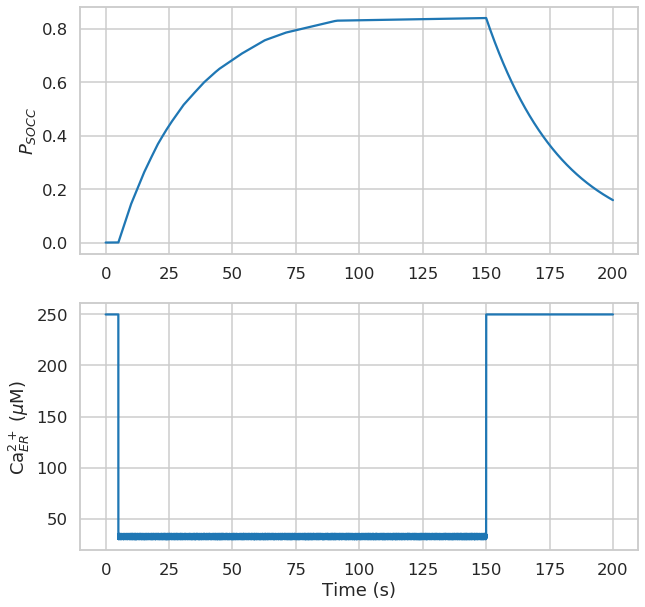

In [3]:
########################## Plotting ###############################################
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t,sol)
plt.ylabel('$P_{SOCC}$')
plt.subplot(2,1,2)
plt.plot(t, [ca_er(k) for k in t])
plt.ylabel('Ca$^{2+}_{ER}$ ($\mu$M)')
plt.xlabel('Time (s)')
plt.show()

## Observations

When ER  Ca$^{2+}$ levels fall, the open probability $P_{so}$ of SOCCs increases

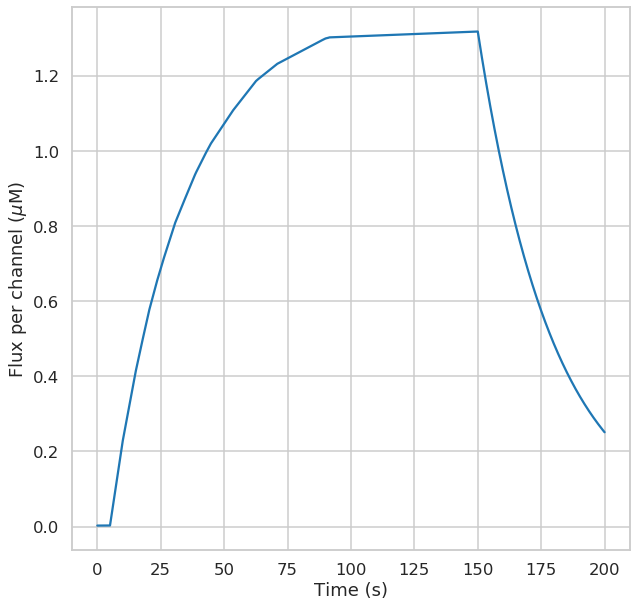

In [4]:
plt.figure(figsize=(10,10))
plt.plot(t, V_socc_max*sol)
plt.xlabel('Time (s)')
plt.ylabel('Flux per channel ($\mu$M)')
#plt.xticks(rotation=45)
plt.show()